In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanayzz","key":"c29c31c2c49d2da3bea589861f03f887"}'}

In [4]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

No datasets found


In [9]:
%cd /content/

/content


In [10]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

 99% 1.28G/1.29G [00:10<00:00, 150MB/s]
100% 1.29G/1.29G [00:10<00:00, 135MB/s]


In [11]:
! unzip amazon-reviews.zip -d train

Archive:  amazon-reviews.zip
  inflating: train/amazon_review_polarity_csv.tgz  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [3]:
!pip install bitermplus

     |████████████████████████████████| 614 kB 3.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bitermplus: filename=bitermplus-0.6.10-cp37-cp37m-linux_x86_64.whl size=931291 sha256=4364c8c84d75e1422e1eaf19c05354856e30b60f1b968ada9eb0c2bc3eb65072
  Stored in directory: /root/.cache/pip/wheels/2b/1a/8d/58328971ebe27f346b2e0c05ea9fe45bc67986310557074141
Successfully built bitermplus


In [4]:
import bitermplus as btm
import numpy as np
import pandas as pd

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Preprocessing**

In [6]:
stop_words = stopwords.words('english')

In [17]:
df = pd.read_csv(
    '/content/train/train.csv', header=None, names=['sent','title','text'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df_select.head()

sent  ...                                           text_new
0.0 0 2                     Stuning even for the non-gamer  ...                     stuning even for the non-gamer
1.0 1 2              The best soundtrack ever to anything.  ...              the best soundtrack ever to anything 
2.0 2 2                                           Amazing!  ...                                           amazing 
3.0 3 2                               Excellent Soundtrack  ...                               excellent soundtrack
4.0 4 2  Remember, Pull Your Jaw Off The Floor After He...  ...  remember  pull your jaw off the floor after he...

[5 rows x 3 columns]

In [20]:
df_select = df[:36000]

In [ ]:
df_select['text'].isnull().values.any()

False

In [22]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
import nltk

In [110]:
from nltk.tokenize import sent_tokenize
def get_sent_tokens(data):
    sentences = []
    # for sent in data:
    sentences.extend(sent_tokenize(data))
    # print('Sentence tokens:', sentences)
    return sentences

In [246]:
def filter_stopwords(words):
    filtered_words = [w for w in words if w not in stop_words]
    return filtered_words

In [109]:
from nltk.tokenize import word_tokenize
def get_word_tokens(sentences):
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    # print('Word tokens:', words)
    return words

In [108]:
def get_pos_tags(words):
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
    return tags

In [107]:
def get_lemma(word_tags):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                   "N": wordnet.NOUN,
                   "V": wordnet.VERB,
                   "R": wordnet.ADV}
        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    return(lemma)

In [105]:
def sent_to_words(sentences):
    for sentence in sentences:
        print(sentence)
        return (gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [242]:
from typing_extensions import final
def sent_to_words_whole_preprocess(sentence):
    # yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    sample_sentences = get_sent_tokens(sentence)
    # print(sample_sentences)
    sample_words = get_word_tokens(sample_sentences)
    sample_words = filter_stopwords(sample_words)
    # print(sample_words)
    sample_tags = get_pos_tags(sample_words)
    # print(sample_tags)
    sample_lemma = get_lemma(sample_tags)
    # print(sample_lemma)
    final_sentence = ' '.join(sample_lemma)
    # print("final: ", final_sentence)
    return final_sentence

In [243]:
preprocessed_text = []

In [252]:
len(preprocessed_text)

36000

In [247]:
for sentence in df_select['title'].values.tolist()[22992:]:
  preprocessed_text.append(sent_to_words_whole_preprocess(sentence))

In [32]:
df_select[df_select["sent"] == 1].shape

(17819, 4)

In [253]:
df_select["text_new"] = preprocessed_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
import re

# remove punctuation
# df['title'] = df['title'].map(lambda x: re.sub('[,\.!?]','',str(x)))
df_select['text_new'] = df_select['text_new'].map(lambda x: re.sub('[,\.!?]','',str(x)))
# df['title'] = df['title'].map(lambda x: str(x).lower())
df_select['text_new'] = df_select['text_new'].map(lambda x: str(x).lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [131]:
#parts of speech tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# **Biterm Topic Model**

In [ ]:
stop_words

In [32]:
texts = df_select['text_new'].str.strip().tolist()

X, vocabulary, vocab_dict = btm.get_words_freqs(texts, stop_words=stop_words)

In [ ]:
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
biterms = btm.get_biterms(docs_vec)

# Initializing and running model, 100
model = btm.BTM(
    X, vocabulary, seed=12321, T=100, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)

 60%|██████    | 12/20 [07:01<04:40, 35.02s/it]

In [ ]:
p_zd = model.transform(docs_vec)

In [227]:
perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 100)
coherence = btm.coherence(model.matrix_topics_words_, X, M=20)

In [228]:
print("perplexity: ", perplexity, "\ncoherence: ", coherence)

perplexity:  2081.2223271442363 
coherence:  [-359.59675761 -360.97913697 -400.19435332 -397.53542547 -374.15243627
 -343.50732591 -320.01761772 -353.5029609  -491.82940736 -380.58469714
 -457.66925986 -387.99097322 -390.30641009 -359.26738532 -362.60159408
 -398.17690734 -351.13981656 -374.1078901  -352.32507992 -382.63383608
 -367.09916569 -349.31008833 -382.86751406 -339.54752225 -342.20077213
 -377.82943535 -366.14473572 -395.14952001 -551.81937411 -394.60882755
 -367.54703686 -492.83958073 -360.66118481 -361.05185597 -382.84663507
 -344.55517651 -396.49269554 -388.14790495 -449.74804326 -395.21728385
 -341.73150969 -440.40683354 -355.98453405 -358.50273322 -343.36773685
 -449.6998976  -375.52910179 -403.73655938 -340.22081683 -364.68686214]


In [29]:
!pip install tmplot

In [214]:
df_select[df_select["text_new"].str.contains("environmental requirement")]

sent  ...                                           text_new
24416     2  ...  as principal of a small environmental consult ...

[1 rows x 4 columns]

In [ ]:
import tmplot as tmp

# Run the interactive report interface
tmp.report(model=model, docs=texts)

# **LDA** LDA on Amazon review

In [255]:
df_select.head()

sent  ...                                           text_new
0     2  ...  this sound track beautiful  it paint senery mi...
1     2  ...  i 'm reading lot review say best 'game soundtr...
2     2  ...  this soundtrack favorite music time  hand  the...
3     2  ...  i truly like soundtrack i enjoy video game mus...
4     2  ...  if 've played game  know divine music  every s...

[5 rows x 4 columns]

In [256]:
data_words = []
data_words = [[word for word in str(sentence).split()] for sentence in df_select['text_new'].values.tolist()]

In [257]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


In [182]:
# word cloud
from wordcloud import WordCloud
unique_string = ""
for sentence in data_words:
  unique_string +=(" ").join(sentence)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)

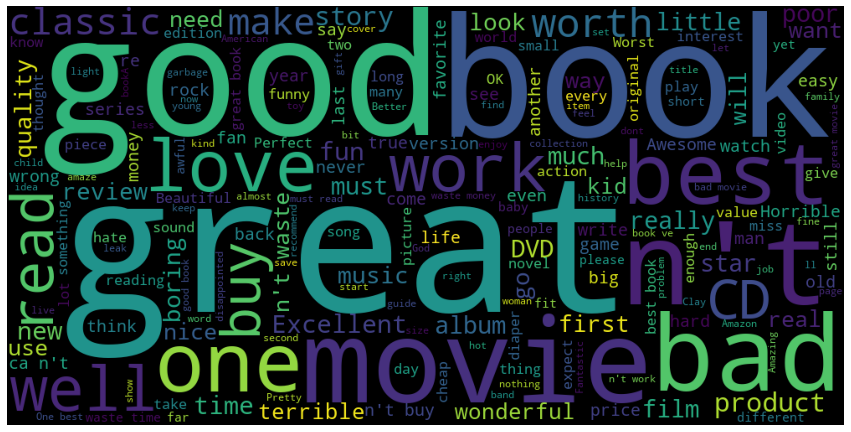

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# plt.savefig('word cloud amazon reviews.png', bbox_inches='tight')
# plt.close()

In [258]:
from pprint import pprint

num_topics = 100

lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(71,
  '0.028*"recipe" + 0.021*"i" + 0.021*"french" + 0.018*"hunt" + 0.012*"witch" '
  '+ 0.012*"\'s" + 0.010*"use" + 0.010*"jennifer" + 0.010*"negative" + '
  '0.010*"riot"'),
 (20,
  '0.019*"i" + 0.018*"the" + 0.015*"\'s" + 0.013*"julie" + 0.010*"like" + '
  '0.010*"it" + 0.009*"make" + 0.009*"n\'t" + 0.009*"good" + 0.009*"minor"'),
 (64,
  '0.041*"i" + 0.019*"book" + 0.018*"the" + 0.013*"kindle" + 0.012*"microsoft" '
  '+ 0.010*"monte" + 0.009*"this" + 0.008*"experiment" + 0.008*"give" + '
  '0.008*"drew"'),
 (5,
  '0.043*"i" + 0.015*"n\'t" + 0.014*"get" + 0.014*"the" + 0.012*"upgrade" + '
  '0.012*"%" + 0.011*"xp" + 0.011*"it" + 0.010*"power" + 0.010*"widescreen"'),
 (1,
  '0.055*"\'s" + 0.025*"animal" + 0.018*"american" + 0.013*"coffee" + '
  '0.013*"the" + 0.011*"halloween" + 0.011*"i" + 0.010*"david" + '
  '0.009*"incredible" + 0.008*"manages"'),
 (61,
  '0.045*"drive" + 0.044*"camera" + 0.027*"i" + 0.016*"device" + 0.015*"sony" '
  '+ 0.012*"work" + 0.012*"cd" + 0.011*"cds" + 

In [235]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.199654448663959


In [259]:
from gensim.models.coherencemodel import CoherenceModel
cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()

In [260]:
coherence

-4.865472460294239